In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os, os.path, pickle, sys

from scipy import stats
import pymannkendall as mk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, Normalize
from matplotlib import cm
# plt.rc("font", family="Times")

from datetime import datetime

In [2]:
dpi_=600
fig_dir = "/Users/hn/Documents/00_GitHub/Ag_Others/presentations/ISLP/"

In [3]:
tick_legend_FontSize = 2
params = {"font.family": "Times",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 4,
          "axes.titlesize": tick_legend_FontSize * 2,
          "xtick.labelsize": tick_legend_FontSize * 4,
          "ytick.labelsize": tick_legend_FontSize * 4,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "xtick.labelbottom": True,
          "ytick.left": True,
          "ytick.labelleft": True,
          "axes.linewidth": 0.05}
plt.rcParams.update(params)

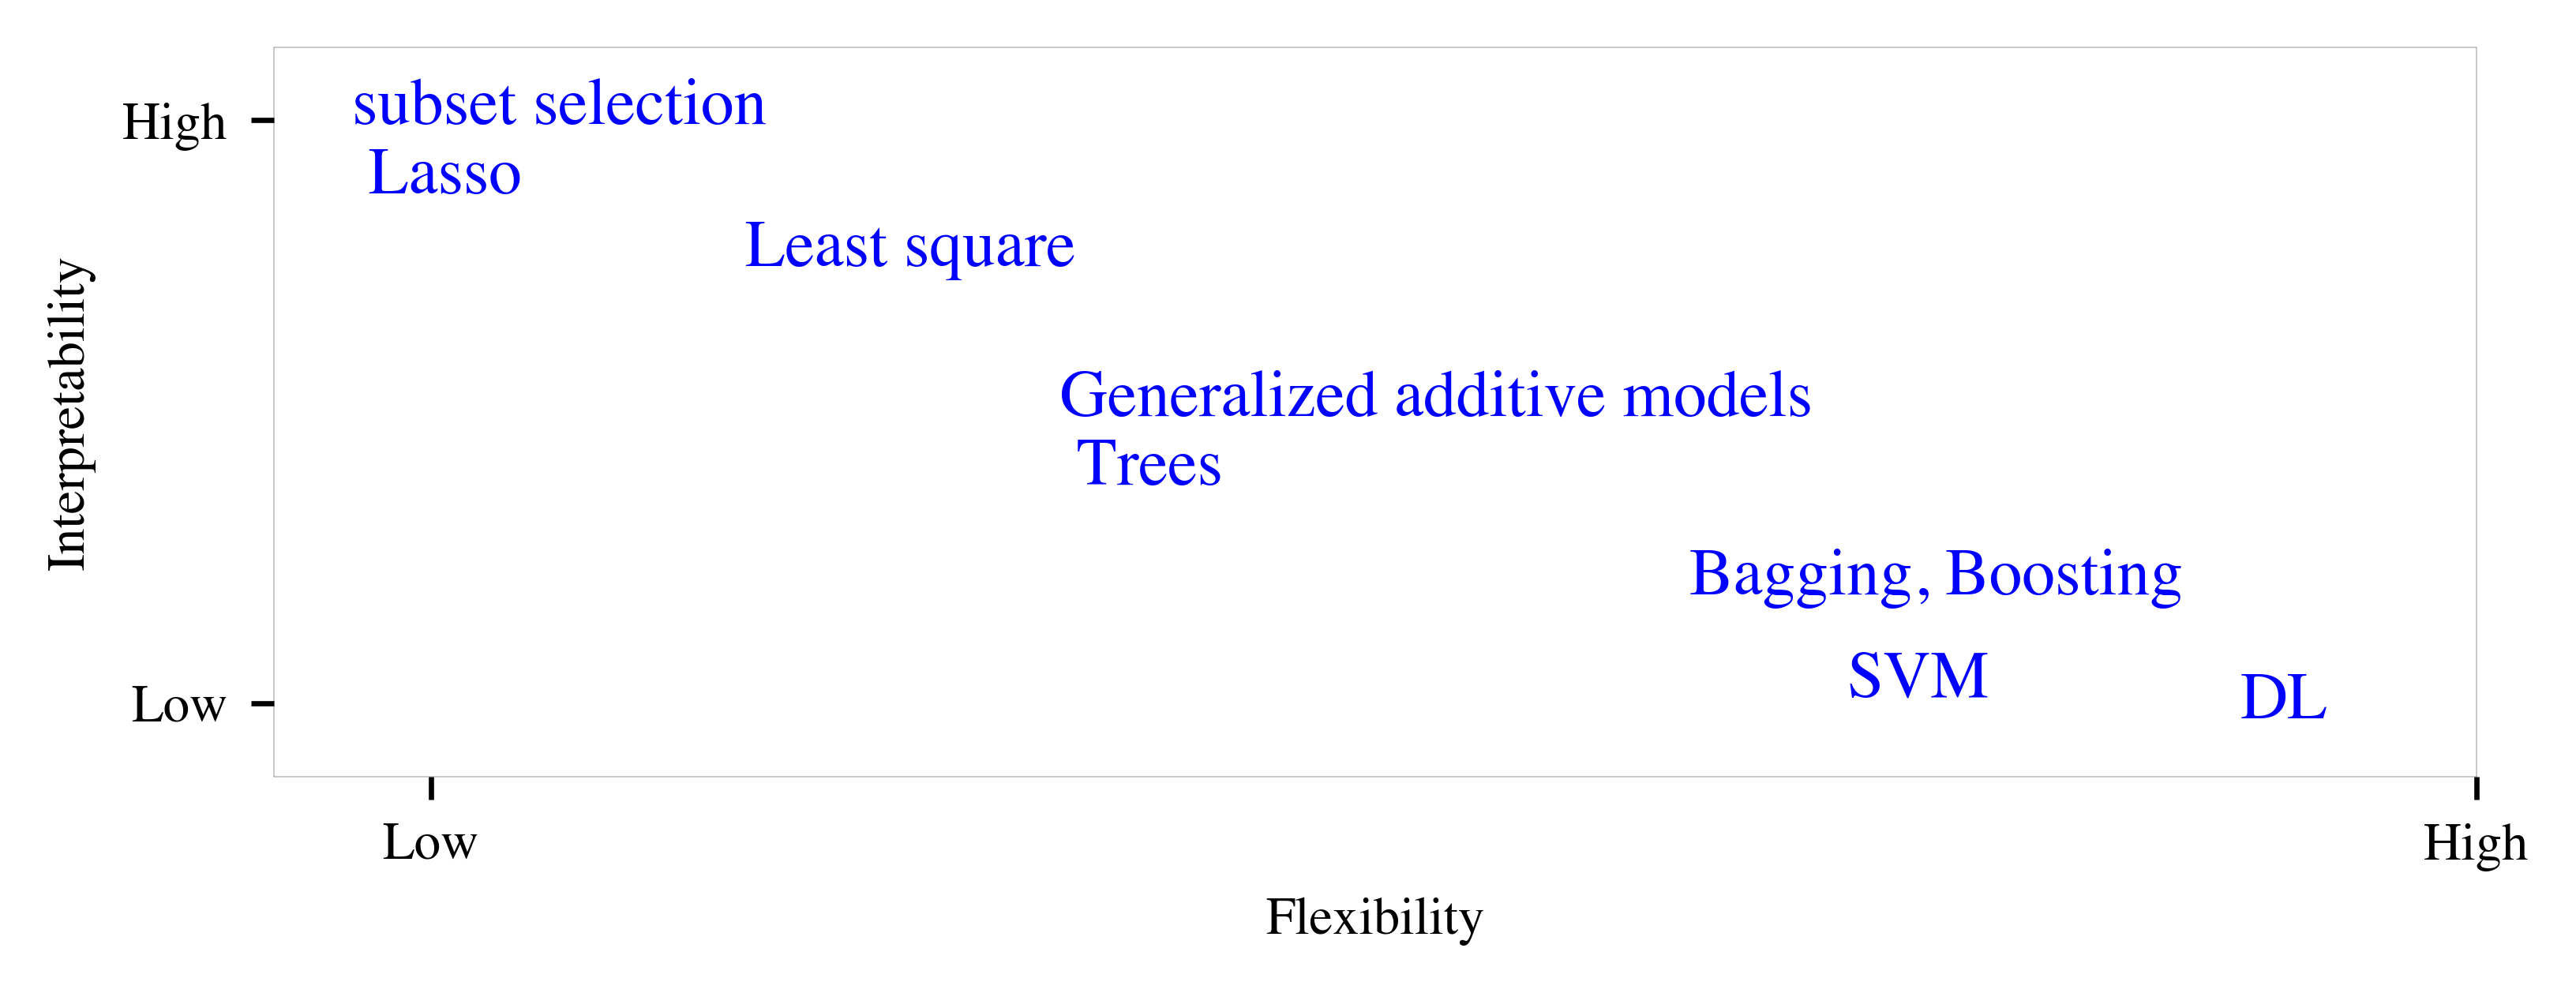

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(6, 2), sharex=True, 
                         gridspec_kw={"hspace": 0.25, "wspace": 0.05}, dpi=dpi_)
x_max = 13
plt.xlim(-1, x_max);
plt.ylim(-1, 9);
axes.set_xlabel("Flexibility"); axes.set_ylabel("Interpretability")

# fontdict={"fontsize": 15, "fontweight": "bold"}
axes.text(x=-0.5, y=7, s=f"subset selection\n Lasso", color="blue");
axes.text(x=2, y=6, s=f"Least square", color="blue");
axes.text(x=4, y=3, s=f"Generalized additive models\n Trees", color="blue");
axes.text(x=8, y=1.5, s=f"Bagging, Boosting", color="blue");
axes.text(x=9, y=.1, s=f"SVM", color="blue");
axes.text(x=11.5, y=-.2, s=f"DL", color="blue");

axes.set_xticks([0, x_max]); axes.set_xticklabels(['Low', 'High']);
axes.set_yticks([0, 8]); axes.set_yticklabels(['Low', 'High']);

fig_name = fig_dir + "model_flex_inter"
# plt.savefig(fig_name + ".pdf", bbox_inches="tight", dpi=600)

In [5]:
tick_legend_FontSize = 4
params = {"font.family": "Times",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 4,
          "axes.titlesize": tick_legend_FontSize * 4,
          "xtick.labelsize": tick_legend_FontSize * 4,
          "ytick.labelsize": tick_legend_FontSize * 4,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "xtick.labelbottom": True,
          "ytick.left": True,
          "ytick.labelleft": True,
          "axes.linewidth": 0.05}
plt.rcParams.update(params)

In [6]:
x_y_line = np.arange(-4, 5)

In [7]:
np.random.seed(1)
vec_size = 100
x = np.random.normal(size=vec_size)
y = x + np.random.normal(loc=0, scale=.1, size=vec_size)
# np. corrcoef (x, y)
x2 = np.random.normal(size=vec_size)
y2 = -(x2 + np.random.normal(loc=0, scale=.1, size=vec_size))

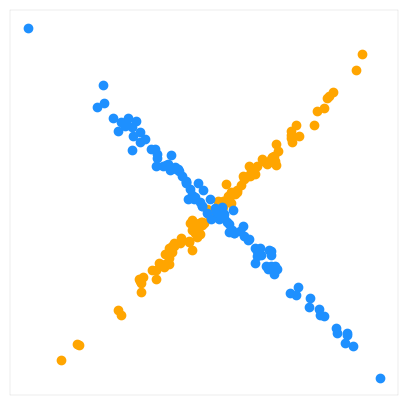

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
# axes.grid(axis="y", which="both");
# axes.plot(x_y_line, x_y_line, label = "$y=x$")

axes.scatter(x, y, color="orange");
axes.scatter(x2, y2, color="dodgerblue");

axes.set_xticks([]); axes.set_yticks([]);

In [9]:
tick_legend_FontSize = 4
params = {"font.family": "Times",
          "legend.fontsize": tick_legend_FontSize * 4,
          "axes.labelsize": tick_legend_FontSize * 4,
          "axes.titlesize": tick_legend_FontSize * 4,
          "xtick.labelsize": tick_legend_FontSize * 4,
          "ytick.labelsize": tick_legend_FontSize * 4,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "xtick.labelbottom": True,
          "ytick.left": True,
          "ytick.labelleft": True,
          "axes.linewidth": 0.05}
plt.rcParams.update(params)

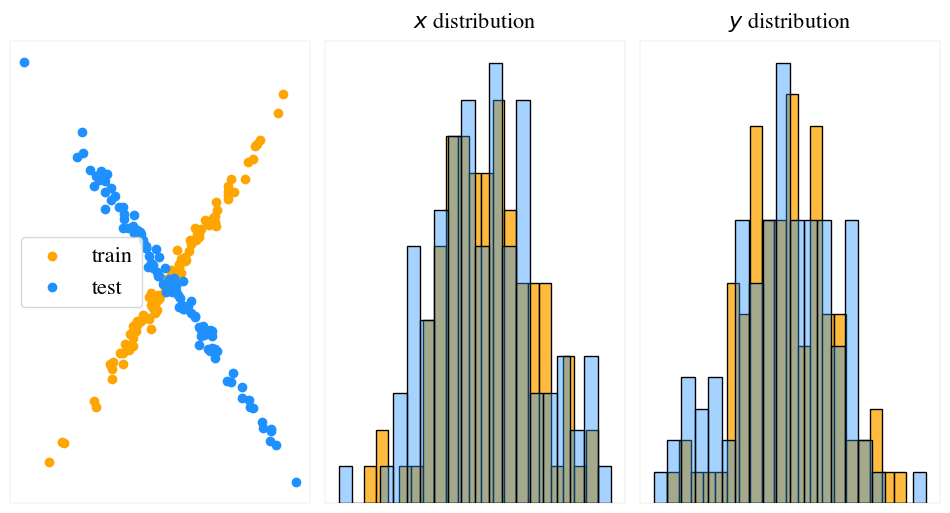

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharex=False, 
                        gridspec_kw={"hspace": 0.35, "wspace": 0.05})

axs[0].grid(axis="y", which="both"); axs[1].grid(axis="y", which="both"); axs[2].grid(axis="y", which="both")
axs[0].set_xticks([]); axs[0].set_yticks([]);
axs[1].set_xticks([]); axs[1].set_yticks([]);
axs[2].set_xticks([]); axs[2].set_yticks([]);


axs[0].scatter(x, y, color="orange", label="train");
axs[0].scatter(x2, y2, color="dodgerblue", label="test");
axs[0].legend(loc="best");

sns.histplot(data=x, ax=axs[1], color="orange",bins=20);
sns.histplot(data=x2, ax=axs[1], color="dodgerblue",bins=20, alpha=0.4);
axs[1].set_title('$x$ distribution');

sns.histplot(data=y, ax=axs[2], color="orange",bins=20);
sns.histplot(data=y2, ax=axs[2], color="dodgerblue",bins=20, alpha=0.4);
axs[2].set_title('$y$ distribution');

fig_name = fig_dir + "hist_comparition_one_at_a_time"
plt.savefig(fig_name + ".pdf", bbox_inches="tight", dpi=600)

In [11]:
#from scipy.stats import wasserstein_distance_nd
from scipy.stats import wasserstein_distance_nd
import scipy
import scipy.stats

dist1 = np.array([x, y])  
dist2 = np.array([x2, y2]) 
# Calculate 2D EMD
emd_distance = scipy.stats.wasserstein_distance_nd(dist1, dist2) 
round(emd_distance, 2)

13.35

In [12]:
a=[0.2, 0.3]; b=[0.1, 0.4]
a2=[0.1, 0.2]; b2=[0.3, 0.4]
dist1 = np.array([a, b])
dist2 = np.array([a2, b2])

# Calculate 2D EMD
print("Earth Mover's Distance dist1 and dist2:", round(wasserstein_distance_nd(dist1, dist2), 2))
print("Earth Mover's Distance dist2 and dist1:", round(wasserstein_distance_nd(dist1, dist2), 2))

Earth Mover's Distance dist1 and dist2: 0.17
Earth Mover's Distance dist2 and dist1: 0.17


In [13]:
from scipy.stats import entropy

# Define two 2D probability distributions
P = np.array([[0.2, 0.3], [0.1, 0.4]])  # First distribution
Q = np.array([[0.3, 0.2], [0.2, 0.3]])  # Second distribution

# Flatten the distributions
P = P.flatten()
Q = Q.flatten()

# Compute KL divergence
print("KL Divergence P and Q:", round(entropy(P, Q), 2))
print("KL Divergence Q and P:", round(entropy(Q, P), 2))

KL Divergence P and Q: 0.09
KL Divergence Q and P: 0.09


In [14]:
# Define two 2D probability distributions
P = np.array([[0.2, 0.3], [0.1, 0.4]])  # First distribution
Q = np.array([[0.3, 0.2], [0.2, 0.3]])  # Second distribution

# Flatten the distributions
P = P.flatten()
Q = Q.flatten()

# Compute KL divergence
kl_div = entropy(P, Q)  # Computes KL(P || Q)

print("KL Divergence:", round(kl_div, 2))

KL Divergence: 0.09


In [15]:
# Define two 2D probability distributions
P = np.array([x, y])   # First distribution
Q = np.array([x2, y2]) # Second distribution

# Flatten the distributions
P = P.flatten()
Q = Q.flatten()

# Compute KL divergence
kl_div = entropy(P, Q)  # Computes KL(P || Q)

print("KL Divergence:", round(kl_div, 2))

KL Divergence: inf


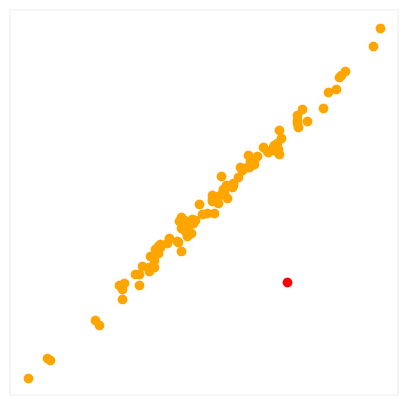

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
# axes.grid(axis="y", which="both");
# axes.plot(x_y_line, x_y_line, label = "$y=x$")

axes.scatter(x, y, color="orange");
axes.scatter(1, -1, color="red");
axes.set_xticks([]); axes.set_yticks([]);

fig_name = fig_dir + "high_leverage_point"
plt.savefig(fig_name + ".pdf", bbox_inches="tight", dpi=600)

In [17]:
x.min()

-2.3015386968802827

In [18]:
x.max()

2.1855754065331614